# Boston's Airbnb Data Analysis

In [2]:
# import all necessary libraries

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# load data

calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')

## 1. Business Requirements

1. How well can we predict a listing's price and what features correlate well with the pricing?
2. Where to invest in a property in Boston to get the maximum number of returns from Airbnb?
3. How well can we predict reviews and what aspects correlate well with the reviews?

## 2. Data Understanding

In [4]:
calendar_df.shape

(1308890, 4)

In [5]:
calendar_df.head()

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

In [6]:
listings_df.shape

(3585, 95)

In [7]:
listings_df.head()

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview        ...          \
0  Roslindale is quiet, convenient and friendly. ...        ...           
1  The room is in Roslindale, a diverse and prima...        ...           
2  The LOCATION: Roslindale is a safe and diverse...        ...           
3  Roslindale is a lovely little neighborhood loc...        ...           
4  I love the proximity to downtown, the neighbor...        ...           

  review_scores_value requires_license license jurisdiction_names  \
0                 NaN                f     NaN                NaN   
1                 9.0                f     NaN                NaN   
2                10.0                f     NaN                NaN   
3                10.0                f     NaN                NaN   
4                10.0                f     NaN                NaN   

  instant_bookable cancellation_policy require_guest_profile_picture  \
0                f            moderate                             f   
1                t            moderate                             f   
2                f            moderate                             t   
3                f            moderate                             f   
4                f            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

   reviews_per_month  
0                NaN  
1               1.30  
2               0.47  
3               1.00  
4               2.25  

[5 rows x 95 columns]

In [8]:
reviews_df.shape

(68275, 6)

In [9]:
reviews_df.head()

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...

## 3. Data Preparation

- Basic data cleaning like converting to correct data types and dropping unwanted columns and setting index to tables is performed below. Working with missing values, both quantitative and categorical will be done with each business problem being addressed.

In [9]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [10]:
calendar_df.set_index('listing_id', inplace=True)

In [11]:
# remove dollar, comma characters to convert price column to float
calendar_df.price = calendar_df.price.str.lstrip('$').str.replace(',', '')
calendar_df.price = calendar_df.price.astype('float')

# convert string date to datetime object
calendar_df.date = pd.to_datetime(calendar_df.date)

In [12]:
# test
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308890 entries, 12147973 to 14504422
Data columns (total 3 columns):
date         1308890 non-null datetime64[ns]
available    1308890 non-null object
price        643037 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 39.9+ MB


In [13]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
listing_id       68275 non-null int64
id               68275 non-null int64
date             68275 non-null object
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [14]:
reviews_df.set_index('id', inplace=True)

In [15]:
# convert string date to datetime object in reviews set
reviews_df.date = pd.to_datetime(reviews_df.date)

In [16]:
# test
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68275 entries, 4724140 to 98550693
Data columns (total 5 columns):
listing_id       68275 non-null int64
date             68275 non-null datetime64[ns]
reviewer_id      68275 non-null int64
reviewer_name    68275 non-null object
comments         68222 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.1+ MB


In [17]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

In [18]:
listings_df.set_index('id', inplace=True)

In [19]:
# convert string dates to datetime objects
listings_df.last_scraped = pd.to_datetime(listings_df.last_scraped)

In [20]:
# convert price column to float type after stripping dollar, comma character
listings_df.price = listings_df.price.str.lstrip('$').str.replace(',', '').astype('float')

In [21]:
# drop columns with no recordings

listings_df.drop(['neighbourhood_group_cleansed', 'jurisdiction_names', 'license', 'has_availability'],
                 axis=1, inplace=True)

In [22]:
# drop rows with price <= 0, bathrooms < 1, bedrooms <=0, accommodates <= 0

listings_df = listings_df[listings_df.price > 0]
listings_df = listings_df[listings_df.bathrooms >= 1]
listings_df = listings_df[listings_df.bedrooms > 0]
listings_df = listings_df[listings_df.accommodates > 0]

In [ ]:
# replace float values to lower value in bathroom column

listings_df['bathrooms'] = listings_df.bathrooms.replace(1.5, 1)
listings_df['bathrooms'] = listings_df.bathrooms.replace(2.5, 2)
listings_df['bathrooms'] = listings_df.bathrooms.replace(3.5, 3)
listings_df['bathrooms'] = listings_df.bathrooms.replace(4.5, 4)

In [23]:
# convert bedrooms, bathrooms, accommodates count to int from float
listings_df.bedrooms = listings_df.bedrooms.astype('int')
listings_df.bathrooms = listings_df.bathrooms.astype('int')
listings_df.accommodates = listings_df.accommodates.astype('int')

In [24]:
# clean city column

listings_df.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Brighton', 'Brighton ',
       'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan',
       'Milton', 'Dorchester', 'dorchester, boston ', 'South Boston',
       'Allston', 'ALLSTON'], dtype=object)

In [25]:
listings_df[listings_df.city=='波士顿']

listing_url       scrape_id last_scraped  \
id                                                                           
4625517  https://www.airbnb.com/rooms/4625517  20160906204935   2016-09-07   

                                       name  \
id                                            
4625517  GreenT&bus stops in front of door    

                                                   summary  \
id                                                           
4625517  Super convenient :30 seconds walk to Green T a...   

                                                     space  \
id                                                           
4625517  Awesome area of Brookline&Boston, one block fr...   

                                               description  \
id                                                           
4625517  Super convenient :30 seconds walk to Green T a...   

        experiences_offered  \
id                            
4625517                none   

                                     neighborhood_overview  \
id                                                           
4625517  Connivence to almost everywhere-  penguins piz...   

                                                     notes        ...         \
id                                                                ...          
4625517  If you are a student, I may give you 5% off.If...        ...          

        review_scores_communication review_scores_location  \
id                                                           
4625517                         NaN                    NaN   

        review_scores_value requires_license instant_bookable  \
id                                                              
4625517                 NaN                f                f   

        cancellation_policy require_guest_profile_picture  \
id                                                          
4625517              strict                             f   

        require_guest_phone_verification  calculated_host_listings_count  \
id                                                                         
4625517                                f                               1   

        reviews_per_month  
id                         
4625517               NaN  

[1 rows x 90 columns]

In [26]:
# drop row with unusual city name since there is only with observation associated with it

listings_df.drop(index=4625517, inplace=True)
listings_df.shape

(3254, 90)

In [27]:
listings_df['city_cleansed'] = listings_df.city.copy()

In [28]:
# replace all duplicate entries

listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ALLSTON', 'Allston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Roslindale, Boston', 'Roslindale')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('dorchester, boston ', 'Dorchester')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(['Boston ', 'boston'], 'Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('east Boston ', 'East Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Boston (Charlestown)', 'Charlestown')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ROXBURY CROSSING', 'Roxbury Crossing')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Brighton ', 'Brighton')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(
    ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

In [29]:
listings_df.city_cleansed.unique()

array(['Boston', 'Roslindale', 'Jamaica Plain', 'Brookline',
       'Roxbury Crossing', 'Jamaica Plain, MA', 'Mission Hill, Boston',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'Charlestown', 'Somerville', 'Brighton', nan,
       'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan', 'Milton',
       'Dorchester', 'South Boston', 'Allston'], dtype=object)

In [30]:
listings_df.fillna(0, inplace=True)

In [31]:
# test
listings_df.shape

(3254, 91)

##### Note
I limited a cleaning process to few column - the ones I'll be using to address the above questions. Since these questions doesn't work with categorical variables, they aren't really wrangled but if any part of the analyses seem to require using categorical data, these needs to be addressed first before sending to analyses

## Exploratory Data Analysis

### How well would we be able to foresee a posting’s cost and what highlights associate well with the estimating?

In [32]:
features_df = listings_df.copy()

In [33]:
# checking if the target label has all entries recorded
features_df.price.count()

3254

In [34]:
features_df.shape

(3254, 91)

In [35]:
# categorizing number of listings with room type
room_type_count = features_df.room_type.value_counts()

In [36]:
room_type_count

Entire home/apt    1825
Private room       1353
Shared room          76
Name: room_type, dtype: int64

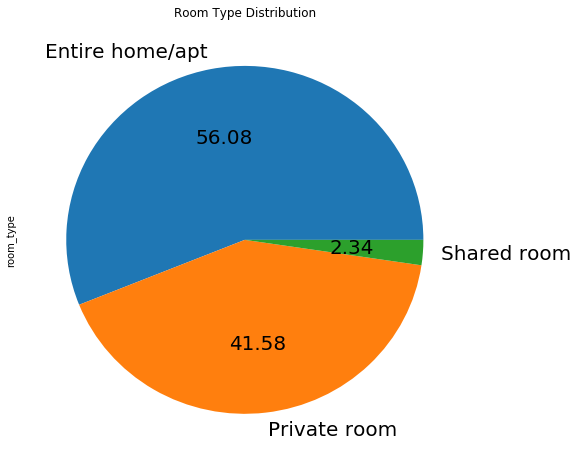

In [37]:
room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution');

In [38]:
# clean property type column
features_df.property_type.unique()

array(['House', 'Apartment', 'Condominium', 'Villa', 'Bed & Breakfast',
       'Townhouse', 'Entire Floor', 'Loft', 'Guesthouse', 'Boat', 'Dorm',
       'Other', 0], dtype=object)

In [39]:
features_df = features_df[features_df.property_type != 0]

In [40]:
# number of listings based on the property type
property_type_count = features_df.property_type.value_counts()

In [41]:
property_type_count

Apartment          2325
House               547
Condominium         220
Townhouse            50
Bed & Breakfast      39
Loft                 32
Other                14
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Name: property_type, dtype: int64

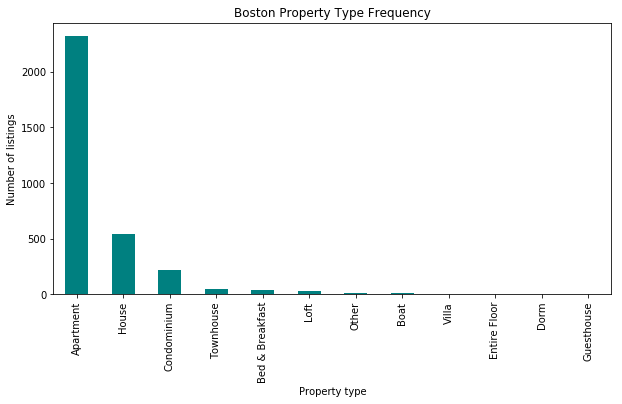

In [42]:
property_type_count.plot.bar(color = 'teal', figsize =(10,5), title = 'Boston Property Type Frequency')
plt.xlabel('Property type');
plt.ylabel('Number of listings');

In [43]:
# analyzing the prices for different room type and property type

prices_data = features_df.groupby(['property_type','room_type']).price.mean()

In [44]:
prices_data

property_type    room_type      
Apartment        Entire home/apt    234.173476
                 Private room        99.102464
                 Shared room         85.409836
Bed & Breakfast  Entire home/apt    142.500000
                 Private room       132.777778
                 Shared room         44.000000
Boat             Entire home/apt    265.200000
                 Private room       287.000000
Condominium      Entire home/apt    239.381295
                 Private room       109.000000
                 Shared room         70.000000
Dorm             Private room        62.500000
Entire Floor     Entire home/apt    154.000000
                 Private room        90.000000
Guesthouse       Entire home/apt    289.000000
House            Entire home/apt    284.219858
                 Private room        80.428212
                 Shared room         62.333333
Loft             Entire home/apt    237.500000
                 Private room        96.250000
                 Shared roo

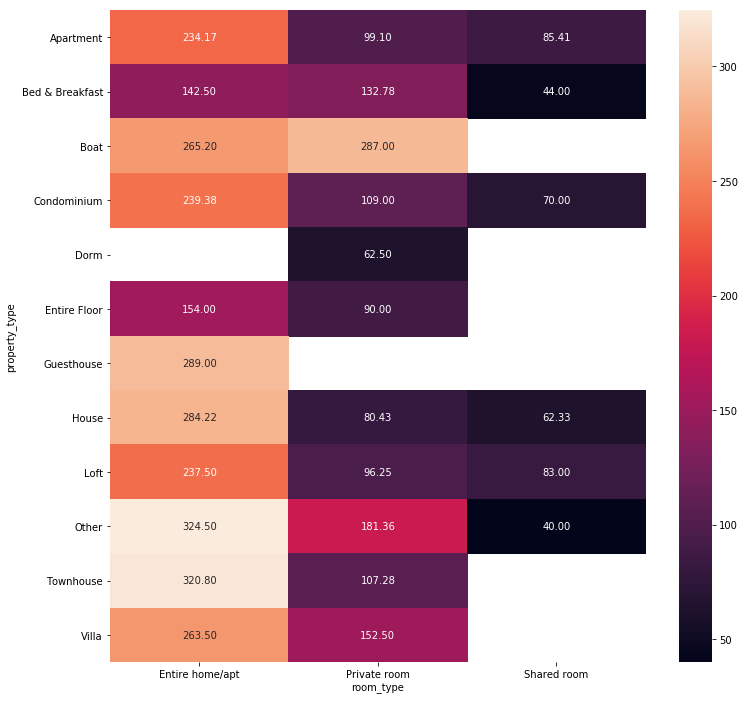

In [45]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f");

In [46]:
features_df.groupby(['neighbourhood_cleansed','room_type']).price.mean()

neighbourhood_cleansed   room_type      
Allston                  Entire home/apt    187.135802
                         Private room        74.026667
                         Shared room         82.333333
Back Bay                 Entire home/apt    283.648241
                         Private room       152.333333
                         Shared room         66.000000
Bay Village              Entire home/apt    306.368421
                         Private room       103.250000
Beacon Hill              Entire home/apt    268.491379
                         Private room       161.971429
                         Shared room        106.000000
Brighton                 Entire home/apt    168.637681
                         Private room        88.584158
                         Shared room         68.500000
Charlestown              Entire home/apt    260.790323
                         Private room       113.071429
                         Shared room         47.000000
Chinatown               

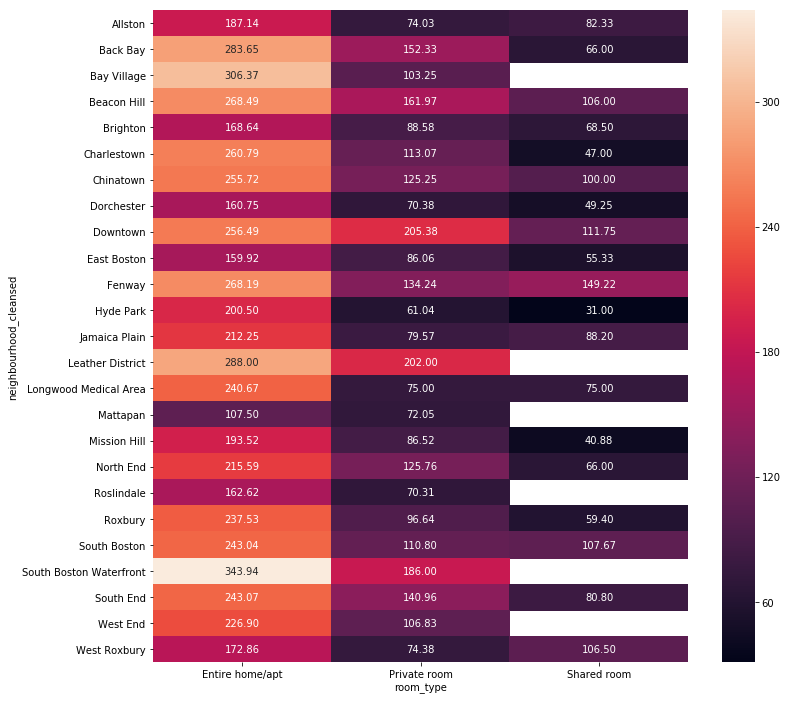

In [47]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['neighbourhood_cleansed', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f")

In [48]:
features_df.groupby(['city_cleansed','room_type']).price.mean()

city_cleansed              room_type      
0                          Private room        71.500000
Allston                    Entire home/apt    295.000000
                           Private room        70.307692
Boston                     Entire home/apt    239.248014
                           Private room        97.942135
                           Shared room         84.231884
Boston, Massachusetts, US  Shared room         50.000000
Brighton                   Entire home/apt    166.600000
                           Private room        80.272727
Brookline                  Entire home/apt    202.833333
                           Private room       104.545455
Cambridge                  Entire home/apt    257.100000
                           Private room       103.166667
Charlestown                Entire home/apt    312.090909
                           Private room       145.000000
Dorchester                 Entire home/apt    192.000000
                           Private room      

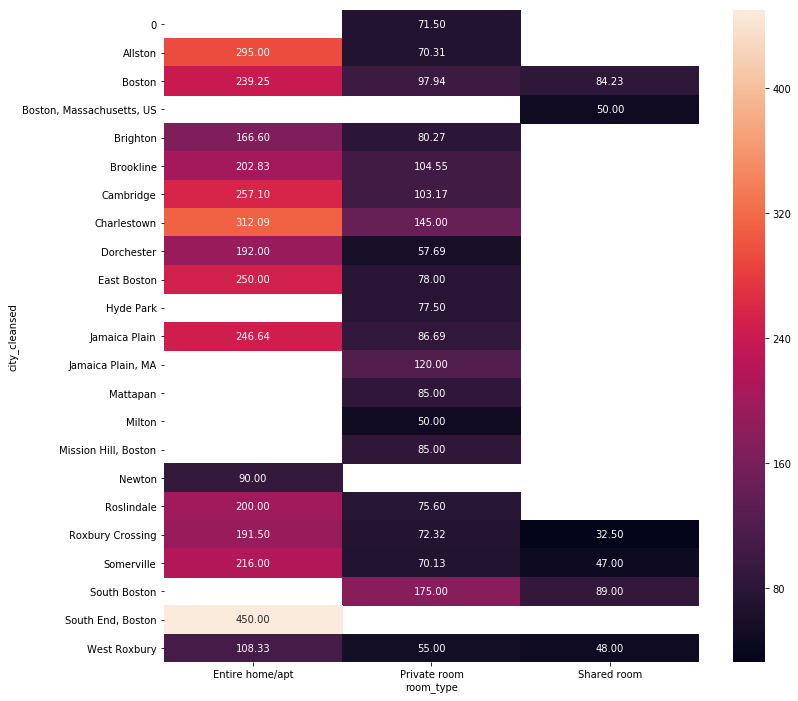

In [49]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['city_cleansed', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f");

### Conclusions:

From the above plots, it can be concluded that prices of listings depends upon following factors:

1) Airbnb Boston has more number of Entire home/apt followed by Private room and then Shared room listings.

2) The type of room chosen hugely influences the price of listings. It can be analyzed that Townhouse with Entire home/apt, Guest house with Entire home/apt and Boat with Private room are the properties with maximum prices and apartments, houses take up an overwhelming majority of listings.

3) Price of a listing also depends upon the neighborhood of the property. Neighborhood such as Harvard Square, Brookline with Entire home/apt, Private room in Downtown Crossing have the peak pricing than other.

4) Entire home/apt in South End, Boston city has the highest paid listings than any other city.

## Where to put resources into a property in Boston to get the most extreme number of profits from Airbnb?

In [50]:
# average price of listings w.r.t room type
price_per_room_type = features_df.groupby('room_type').price.mean()

In [51]:
price_per_room_type

room_type
Entire home/apt    239.097039
Private room        96.356509
Shared room         81.065789
Name: price, dtype: float64

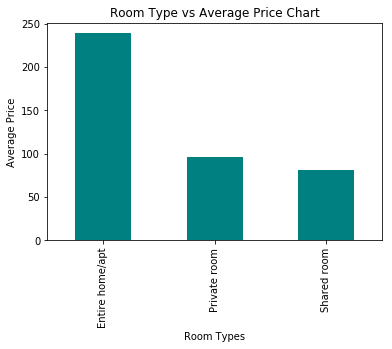

In [52]:
# plot a graph that depicts a relation between room type and price
price_per_room_type.plot(kind='bar', color='teal');
plt.xlabel('Room Types')
plt.ylabel('Average Price')
plt.title('Room Type vs Average Price Chart');

In [53]:
# average price of listings w.r.t neighbourhood
price_per_neighbourhood = features_df.groupby('neighbourhood_cleansed').price.mean()

In [54]:
price_per_neighbourhood

neighbourhood_cleansed
Allston                    112.894515
Back Bay                   261.042017
Bay Village                271.043478
Beacon Hill                241.116883
Brighton                   119.284091
Charlestown                199.666667
Chinatown                  237.820896
Dorchester                  91.905660
Downtown                   244.529801
East Boston                118.537931
Fenway                     227.651341
Hyde Park                   87.933333
Jamaica Plain              139.110448
Leather District           253.600000
Longwood Medical Area      137.125000
Mattapan                    75.130435
Mission Hill               123.016807
North End                  199.157895
Roslindale                  99.274510
Roxbury                    146.921875
South Boston               187.304094
South Boston Waterfront    318.666667
South End                  213.521236
West End                   211.895833
West Roxbury               106.444444
Name: price, dtype: float64

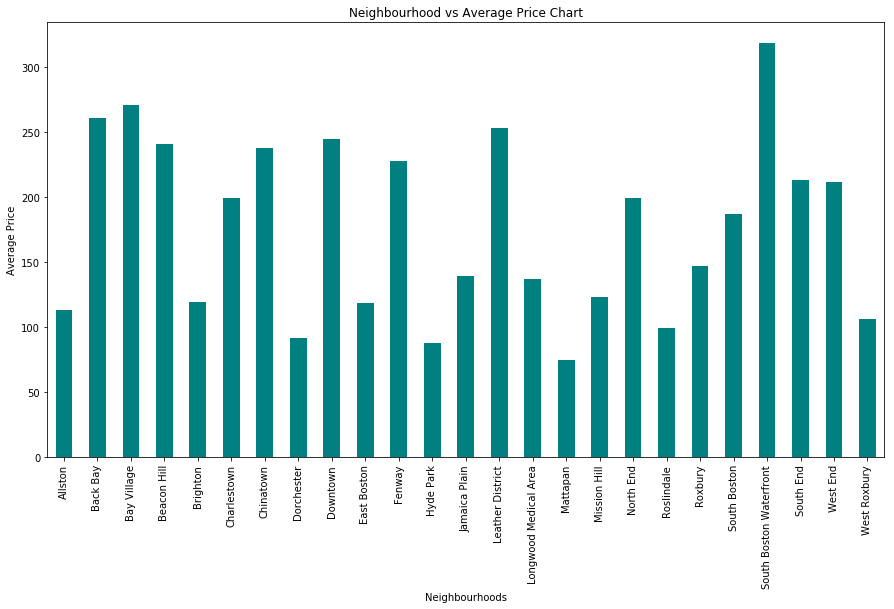

In [55]:
# plot a graph that depicts a relation between neighbourhood and price
plt.figure(figsize=(15,8));
price_per_neighbourhood.plot(kind='bar', color='teal');
plt.xlabel('Neighbourhoods')
plt.ylabel('Average Price')
plt.title('Neighbourhood vs Average Price Chart');

In [56]:
# average price of listings w.r.t city
price_per_city = features_df.groupby('city_cleansed').price.mean()

In [57]:
price_per_city

city_cleansed
0                             71.500000
Allston                       86.357143
Boston                       179.052322
Boston, Massachusetts, US     50.000000
Brighton                     107.250000
Brookline                    139.235294
Cambridge                    199.375000
Charlestown                  267.533333
Dorchester                    75.600000
East Boston                  121.000000
Hyde Park                     77.500000
Jamaica Plain                160.000000
Jamaica Plain, MA            120.000000
Mattapan                      85.000000
Milton                        50.000000
Mission Hill, Boston          85.000000
Newton                        90.000000
Roslindale                    96.333333
Roxbury Crossing              95.851852
Somerville                    91.947368
South Boston                 132.000000
South End, Boston            450.000000
West Roxbury                  85.600000
Name: price, dtype: float64

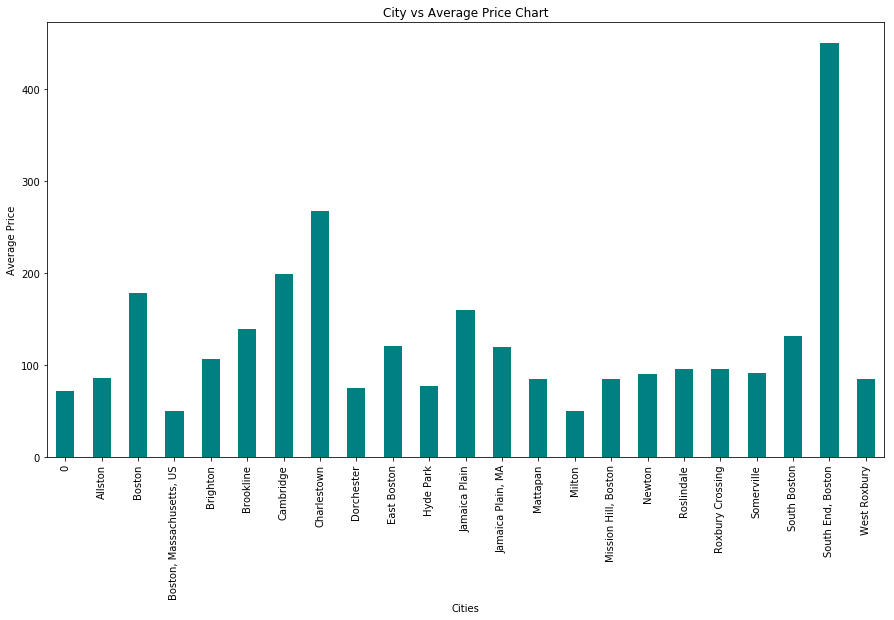

In [58]:
# plot a graph that depicts a relation between city and price
plt.figure(figsize=(15,8));
price_per_city.plot(kind='bar', color='teal');
plt.xlabel('Cities')
plt.ylabel('Average Price')
plt.title('City vs Average Price Chart');

In [59]:
# average price of listings w.r.t property type
price_per_property_type = features_df.groupby('property_type').price.mean()

In [60]:
price_per_property_type

property_type
Apartment          185.479140
Bed & Breakfast    131.000000
Boat               268.833333
Condominium        191.022727
Dorm                62.500000
Entire Floor       122.000000
Guesthouse         289.000000
House              132.661792
Loft               192.531250
Other              191.714286
Townhouse          149.980000
Villa              189.500000
Name: price, dtype: float64

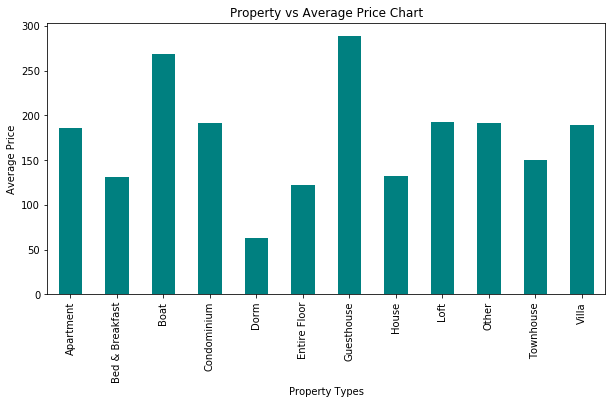

In [61]:
# plot a graph that depicts a relation between property type and price
plt.figure(figsize=(10,5));
price_per_property_type.plot(kind='bar', color='teal');
plt.xlabel('Property Types')
plt.ylabel('Average Price')
plt.title('Property vs Average Price Chart');

In [62]:
# average price of listings w.r.t street
price_per_street = features_df.groupby('street').price.mean()

In [63]:
price_per_street = price_per_street.sort_values(ascending=False)

In [64]:
price_per_street

street
Myrtle Street, unit, Boston, MA 02114, United States               1345.000000
Boston Wharf Road, Boston, MA 02210, United States                 1250.000000
Congress Street, Boston, MA 02210, United States                   1209.333333
8th Street, Charlestown, MA 02129, United States                   1000.000000
Hillside Street, Boston, MA 02115, United States                    872.000000
Edgerly Road, Boston, MA 02115, United States                       786.000000
West 1st Street, Boston, MA 02127, United States                    700.000000
West Canton Street, Boston, MA 02118, United States                 696.250000
Centre St, Boston, MA 02130, United States                          625.000000
Cross St, Boston, MA 02129, United States                           600.000000
Boston, MA 02116, United States                                     600.000000
Fulton St, Boston, MA 02109, United States                          600.000000
Huntington Avenue, Boston, MA 02116, United S

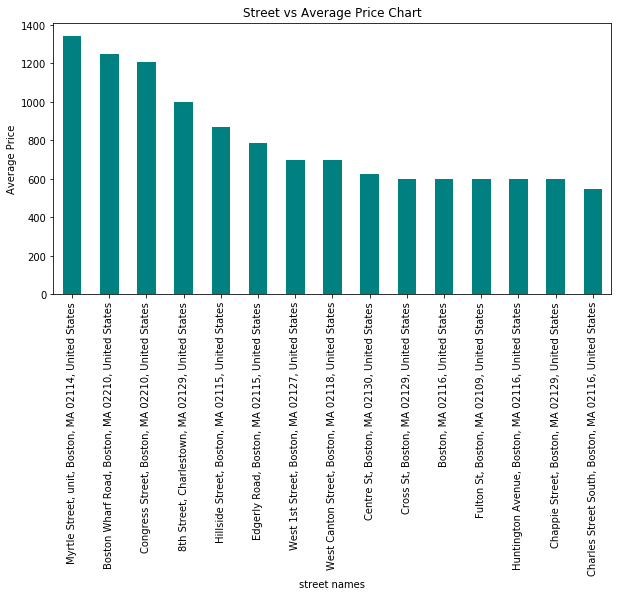

In [65]:
# plot a graph that depicts a relation between street and price
plt.figure(figsize=(10,5));
price_per_street[:15].plot(kind='bar', color='teal');
plt.xlabel('street names')
plt.ylabel('Average Price')
plt.title('Street vs Average Price Chart');

### Conclusion

This dataset gives us the insights of the price distribution based on the location, the facility provides and the room types. Thanks for reading!!

## How well would we be able to foresee audits and what angles relate with reviews?

In [66]:
features_df.review_scores_rating.unique()

array([  0.,  94.,  98., 100.,  99.,  90.,  96.,  80.,  97.,  91.,  95.,
        88.,  92.,  87.,  93.,  73.,  82.,  20.,  89.,  81.,  78.,  74.,
        60.,  86.,  85.,  75.,  79.,  70.,  83.,  64.,  84.,  40.,  68.,
        67.,  48.,  77.,  71.,  65.,  76.,  53.,  47.,  72.,  46.,  50.,
        66.,  69.,  55.])

In [67]:
ratings_per_neighbourhood = features_df.groupby(
    ['neighbourhood_cleansed', 'property_type']).review_scores_rating.mean()

In [68]:
ratings_per_neighbourhood.sort_values(ascending=False)

neighbourhood_cleansed   property_type  
Charlestown              Boat               100.000000
South Boston             Loft               100.000000
Mission Hill             Townhouse          100.000000
Bay Village              Condominium        100.000000
Downtown                 Boat               100.000000
Bay Village              Guesthouse         100.000000
                         Townhouse          100.000000
Charlestown              Entire Floor       100.000000
Brighton                 Loft               100.000000
Downtown                 House               99.500000
South Boston Waterfront  Condominium         99.333333
Hyde Park                Condominium         99.000000
                         Bed & Breakfast     99.000000
North End                Loft                99.000000
Roslindale               Villa               99.000000
Jamaica Plain            Townhouse           98.500000
                         Loft                98.000000
Downtown                

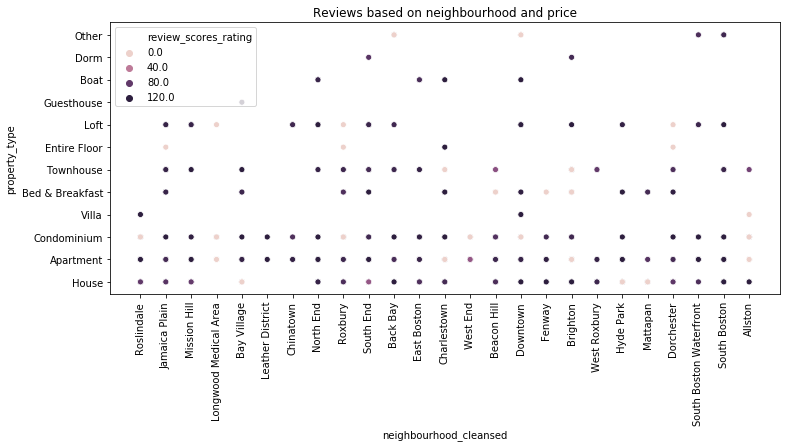

In [69]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='neighbourhood_cleansed', y='property_type', hue='review_scores_rating', data=features_df);
plt.xticks(rotation=90);
plt.title('Reviews based on neighbourhood and price');

In [70]:
ratings_per_property_type = features_df.groupby('property_type').review_scores_rating.mean()

In [71]:
ratings_per_property_type

property_type
Apartment           68.781505
Bed & Breakfast     66.871795
Boat                83.833333
Condominium         72.600000
Dorm                86.500000
Entire Floor        25.000000
Guesthouse         100.000000
House               78.661792
Loft                81.406250
Other               49.928571
Townhouse           79.440000
Villa               33.166667
Name: review_scores_rating, dtype: float64

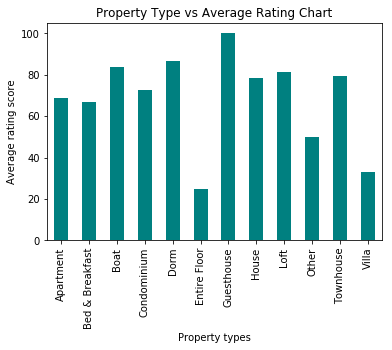

In [72]:
ratings_per_property_type.plot(kind='bar',color='teal');
plt.xlabel('Property types')
plt.ylabel('Average rating score')
plt.title('Property Type vs Average Rating Chart');

In [73]:
ratings_per_bedrooms = features_df.groupby(['property_type', 'bedrooms']).review_scores_rating.mean()

In [74]:
ratings_per_bedrooms

property_type    bedrooms
Apartment        1            69.339450
                 2            66.277580
                 3            73.485714
                 4            81.764706
                 5            32.166667
Bed & Breakfast  1            66.105263
                 2            96.000000
Boat             1            66.666667
                 2            89.000000
                 3            94.000000
Condominium      1            72.520548
                 2            72.032258
                 3            81.000000
                 4            41.500000
                 5            93.500000
Dorm             1            86.500000
Entire Floor     1            50.000000
                 2             0.000000
Guesthouse       2           100.000000
House            1            78.159722
                 2            75.931818
                 3            78.641026
                 4            88.040000
                 5            93.428571
Loft          

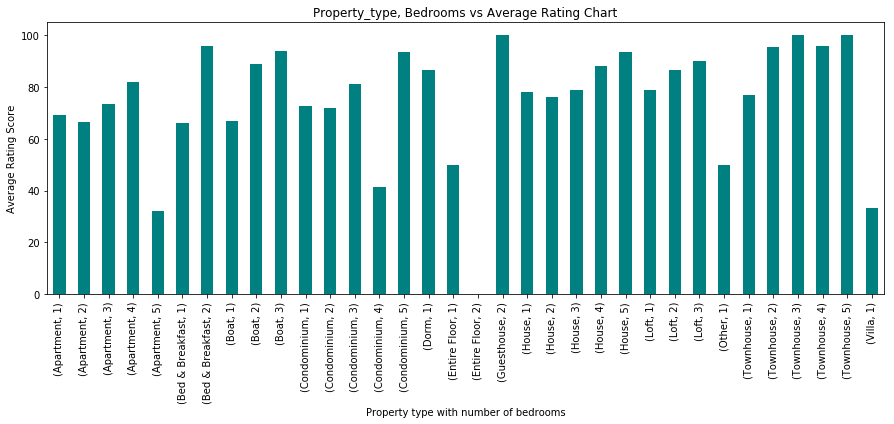

In [75]:
plt.figure(figsize=(15, 5))
ratings_per_bedrooms.plot(kind='bar',color='teal');
plt.xlabel('Property type with number of bedrooms')
plt.ylabel('Average Rating Score')
plt.title('Property_type, Bedrooms vs Average Rating Chart');

In [77]:
features_df.bathrooms.unique()

array([1, 2, 3, 4, 5, 6])

In [78]:
ratings_per_bathrooms = features_df.groupby(['property_type', 'bathrooms']).review_scores_rating.mean()

In [79]:
ratings_per_bathrooms

property_type    bathrooms
Apartment        1             70.617766
                 2             58.393491
                 3             64.333333
                 4             98.000000
                 5              0.000000
Bed & Breakfast  1             62.558824
                 2             96.200000
Boat             1             80.777778
                 2             93.000000
Condominium      1             71.977778
                 2             77.333333
                 3              0.000000
Dorm             1             86.500000
Entire Floor     1             33.333333
                 2              0.000000
Guesthouse       1            100.000000
House            1             77.981818
                 2             78.291667
                 3             95.687500
                 4            100.000000
Loft             1             82.185185
                 2             74.000000
                 3             90.000000
Other            1            

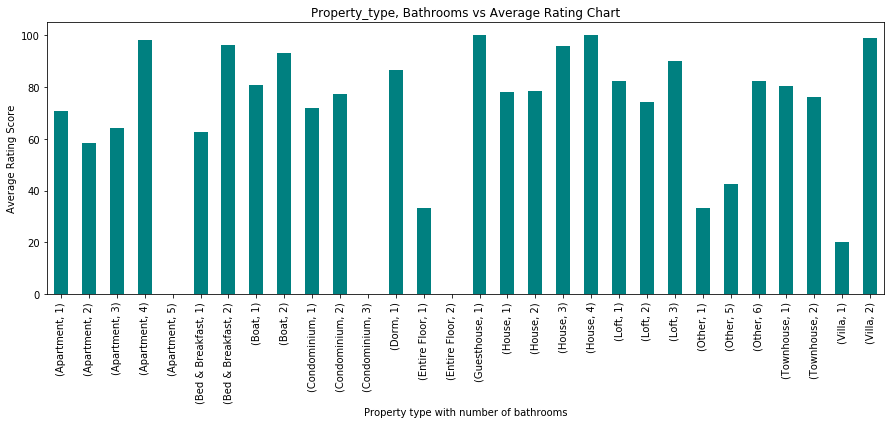

In [80]:
plt.figure(figsize=(15, 5))
ratings_per_bathrooms.plot(kind='bar',color='teal');
plt.xlabel('Property type with number of bathrooms')
plt.ylabel('Average Rating Score')
plt.title('Property_type, Bathrooms vs Average Rating Chart');

### Conclusion

This dataset gives us the insights of the price distribution based on the location, the facility provides and the room types. Thanks for reading!!